In [1]:
#Sumber Sentiment analysis & Visualisasi
#https://github.com/stepthom/textblob-sentiment-analysis/blob/master/doAnalysis.py

# The main package to help us with our text analysis
from textblob import TextBlob
# For reading input files in CSV format
import csv
# For doing cool regular expressions
import re
# For sorting dictionaries
import operator
# For plotting results
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# Intialize an empty list to hold all of our tweets
tweets = []

with open('clean.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        tweet= dict()
        tweet[''] = row[0]
        tweet['clean'] = (row[1])

        tweet['TextBlob'] = TextBlob(tweet['clean'])
        tweets.append(tweet)

In [8]:
for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

    if tweet['polarity'] > 0.0:
        tweet['sentiment'] = 'positive'
    elif tweet['polarity'] < -0.0:
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])

In [9]:
# EVALUATE RESULTS

# First, print out a few example tweets from each sentiment category.

print ("\n\nTOP NEGATIVE TWEETS")
negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
for tweet in negative_tweets[0:100]:
     print ("polarity=%.2f, clean=%s" % (tweet['polarity'], tweet['clean']))

print ("\n\nTOP POSITIVE TWEETS")
positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
for tweet in positive_tweets[-100:]:
    print ("polarity=%.2f, clean=%s" % (tweet['polarity'], tweet['clean']))

print ("\n\nTOP NEUTRAL TWEETS")
neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
for tweet in neutral_tweets[0:500]:
    print ("polarity=%.2f, clean=%s" % (tweet['polarity'], tweet['clean']))



TOP NEGATIVE TWEETS
polarity=-1.00, clean=over year that s insane
polarity=-1.00, clean=please stay away your opinion is tainted by your lying complicit work for the worst president in u s history
polarity=-1.00, clean=disgusting
polarity=-1.00, clean=this picture is from today trump is disgusting
polarity=-1.00, clean=donald trump is speaking to the demon living in their head bringing out the worst in them
polarity=-1.00, clean=boring idk about that but it probably didn t get anybody mass murdered so it depends on how you look at it
polarity=-1.00, clean=can you imagine how awful it would be if s go to platform wa instagram
polarity=-1.00, clean=evil
polarity=-1.00, clean=the mayor of dayton is probably having the worst week of her life and trump ha the nerve to pick a twitter fight with her and then make a campaign video of his visit he is a disgrace to humanity
polarity=-1.00, clean=i guess the truth is boring to you you don t know what the hell you re doing with the economy
polar

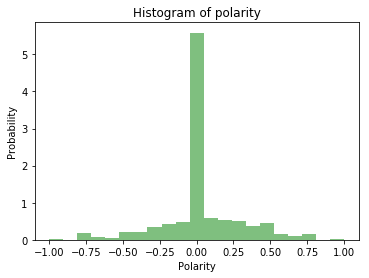

In [53]:
# Next, create some plots

# A histogram of the scores.
x = [d['polarity'] for d in tweets_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

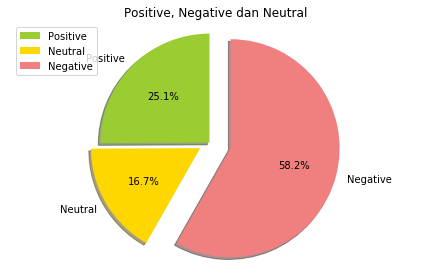

In [54]:
pos = len(positive_tweets)
neu = len(negative_tweets)
neg = len(neutral_tweets)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
explode = (0, 0.1,0.2)
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc='best')
plt.title('Positive, Negative dan Neutral')
plt.tight_layout()
plt.axis('equal')
plt.show()

In [12]:
len(positive_tweets)

3161

In [11]:
len(negative_tweets)

2506

In [10]:
len(neutral_tweets)

4334

In [13]:
(positive_tweets)

[{'': '6233',
  'clean': 'trump never said all of his supporter were mentally stable also there are people out there who still can t get over the fact that donald trump is president so they attack him and his supporter i hope that clear it up',
  'TextBlob': TextBlob("trump never said all of his supporter were mentally stable also there are people out there who still can t get over the fact that donald trump is president so they attack him and his supporter i hope that clear it up"),
  'polarity': 6.938893903907228e-18,
  'subjectivity': 0.29166666666666663,
  'sentiment': 'positive'},
 {'': '6516',
  'clean': 'or you could just work since you re the president and you should be busy remember when you at least pretended you didn t watch much tv #trump',
  'TextBlob': TextBlob("or you could just work since you re the president and you should be busy remember when you at least pretended you didn t watch much tv #trump"),
  'polarity': 9.25185853854297e-18,
  'subjectivity': 0.3,
  'sentim